<h1>contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pprint
import functools
import tqdm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim

import optuna

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import display

%matplotlib inline

In [2]:
class MultiLayerPerceptronRegressor(nn.Module):
    """
    feedforward neural network regressor
    """
    def __init__(self, layers:list, activation:torch.nn.modules.activation):
        super(MultiLayerPerceptronRegressor, self).__init__()
        _architecture = list()

        for index, layer in enumerate(layers[:-2]):
            _architecture.append(nn.Linear(layer, layers[index+1]))
            _architecture.append(activation())
        _architecture.append(nn.Linear(layers[-2], layers[-1]))
        
        self.architecture = nn.Sequential(*_architecture)

    def forward(self, x):
        return self.architecture(x)

torch.manual_seed(33) ;


$$ \ddot{x} + \frac{\mu}{m} \dot{x} + \frac{k}{m} x = 0 $$

wprime = 3.1559467676119004
50 5 62.25209999999999


,time,displacement
0,0.00000,-2.328306e-10
1,0.10101,2.070715e-03
2,0.20202,4.380658e-03
3,0.30303,8.149200e-03
4,0.40404,1.320770e-02


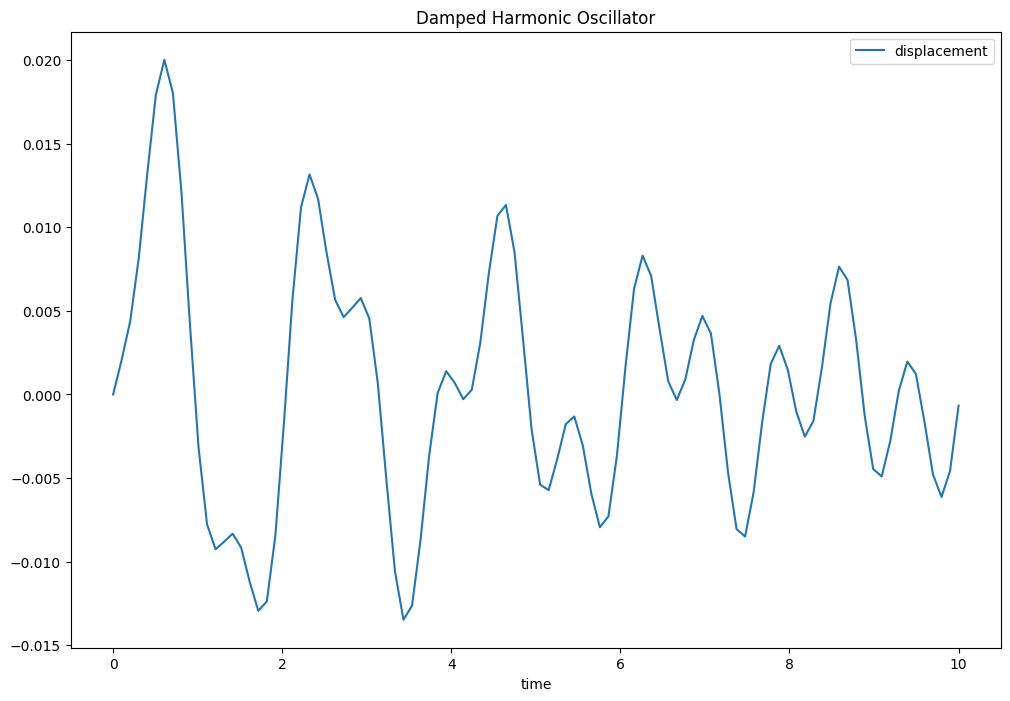

In [14]:
X = pd.read_csv("../data/01_raw/damped-harmonic-oscillator/extrapolation/train.csv").query("time <= 50")

# min_max_scaler = MinMaxScaler()
# X["time"] = min_max_scaler.fit_transform(X["time"].values.reshape(-1, 1))

def driven_oscillator(t, m, k, c, w0, w, F0, x0, v0, phid):
    w0 = np.sqrt(k/m)
    gamma = c/2/m
    
    wprime = np.sqrt(w0**2 - gamma**2)
    print(f"wprime = {wprime}")
    A = F0 / m / np.sqrt((w0**2 - w**2)**2 + 4 * gamma**2 * w**2 )
    
    print(k, m, w**2)
    phi = np.arctan(c * w / (k - m * w**2)) - phid
    phih = np.arctan(wprime * (x0 - A * np.cos(phi)) \
        / (v0 + gamma * (x0 - A * np.cos(phi)) - A * w * np.sin(phi) ) )
    
    Ah = (x0 - A * np.cos(phi)) / np.sin(phih)
    
    x = Ah * np.exp(-gamma * t) * np.sin(wprime * t + phih) + A * np.cos(w * t - phi)
    
    return x

d, w0 = 2, 20
m = 5
k = 50
c = 2
w = 7.89
F0 = 1.2345
x0 = 0
v0 = 0.025
phid = 1

x = torch.linspace(0,10,100).view(-1,1)
y = driven_oscillator(x, m, k, c, w0, w, F0, x0, v0, phid)

X = pd.DataFrame({"time": x.squeeze(), "displacement": y.squeeze()})

display(X.head())

X.plot(x="time", y="displacement", figsize=(12, 8), title="Damped Harmonic Oscillator") ;

MultiLayerPerceptronRegressor(
  (architecture): Sequential(
    (0): Linear(in_features=1, out_features=32, bias=True)
    (1): Tanh()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): Tanh()
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): Tanh()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)


  3%|█▎                                   | 1033/30000 [00:05<02:28, 195.08it/s]

F0:  1.1158392429351807
Data Loss: 0.000060, Physics Loss: 0.623202, x0 Loss: 0.000044, v0 Loss: 0.000267, Total Loss: 0.000122


  7%|██▌                                  | 2031/30000 [00:10<02:22, 195.80it/s]

F0:  0.48269960284233093
Data Loss: 0.000042, Physics Loss: 0.127883, x0 Loss: 0.000002, v0 Loss: 0.001548, Total Loss: 0.000055


 10%|███▋                                 | 3036/30000 [00:15<02:16, 197.79it/s]

F0:  0.13284510374069214
Data Loss: 0.000036, Physics Loss: 0.017458, x0 Loss: 0.000013, v0 Loss: 0.001231, Total Loss: 0.000038


 13%|████▉                                | 4043/30000 [00:19<01:40, 257.53it/s]

F0:  0.027930814772844315
Data Loss: 0.000033, Physics Loss: 0.012731, x0 Loss: 0.000014, v0 Loss: 0.000662, Total Loss: 0.000034


 17%|██████▏                              | 5020/30000 [00:24<02:10, 191.14it/s]

F0:  0.01326378807425499
Data Loss: 0.000031, Physics Loss: 0.014414, x0 Loss: 0.000010, v0 Loss: 0.000446, Total Loss: 0.000033


 20%|███████▍                             | 6036/30000 [00:29<01:59, 200.51it/s]

F0:  0.0050386968068778515
Data Loss: 0.000053, Physics Loss: 0.055085, x0 Loss: 0.000012, v0 Loss: 0.000302, Total Loss: 0.000058


 23%|████████▋                            | 7036/30000 [00:34<02:01, 189.69it/s]

F0:  -0.0013782148016616702
Data Loss: 0.000027, Physics Loss: 0.017966, x0 Loss: 0.000009, v0 Loss: 0.000525, Total Loss: 0.000029


 27%|█████████▉                           | 8026/30000 [00:40<01:51, 196.69it/s]

F0:  -0.00428358418866992
Data Loss: 0.000025, Physics Loss: 0.022745, x0 Loss: 0.000009, v0 Loss: 0.000576, Total Loss: 0.000028


 30%|███████████▏                         | 9032/30000 [00:45<01:43, 201.94it/s]

F0:  -0.002624362939968705
Data Loss: 0.000024, Physics Loss: 0.023153, x0 Loss: 0.000009, v0 Loss: 0.000585, Total Loss: 0.000027


 33%|████████████                        | 10041/30000 [00:50<01:37, 205.15it/s]

F0:  0.00048093879013322294
Data Loss: 0.000026, Physics Loss: 0.018279, x0 Loss: 0.000005, v0 Loss: 0.000445, Total Loss: 0.000027


 37%|█████████████▎                      | 11048/30000 [00:53<01:07, 282.78it/s]

F0:  0.004352066200226545
Data Loss: 0.000022, Physics Loss: 0.027697, x0 Loss: 0.000009, v0 Loss: 0.000582, Total Loss: 0.000024


 40%|██████████████▍                     | 12040/30000 [00:57<01:03, 281.38it/s]

F0:  0.008306190371513367
Data Loss: 0.000021, Physics Loss: 0.025286, x0 Loss: 0.000009, v0 Loss: 0.000596, Total Loss: 0.000023


 43%|███████████████▋                    | 13025/30000 [01:02<01:30, 187.28it/s]

F0:  0.013776480220258236
Data Loss: 0.000019, Physics Loss: 0.027005, x0 Loss: 0.000009, v0 Loss: 0.000590, Total Loss: 0.000022


 47%|████████████████▊                   | 14024/30000 [01:07<01:19, 200.85it/s]

F0:  0.02057359553873539
Data Loss: 0.000017, Physics Loss: 0.025803, x0 Loss: 0.000009, v0 Loss: 0.000593, Total Loss: 0.000020


 50%|██████████████████                  | 15032/30000 [01:12<01:14, 200.34it/s]

F0:  0.02194145694375038
Data Loss: 0.000014, Physics Loss: 0.021047, x0 Loss: 0.000010, v0 Loss: 0.000537, Total Loss: 0.000016


 53%|███████████████████▏                | 16034/30000 [01:17<01:10, 199.19it/s]

F0:  0.01479739136993885
Data Loss: 0.000013, Physics Loss: 0.025181, x0 Loss: 0.000019, v0 Loss: 0.000438, Total Loss: 0.000016


 57%|████████████████████▍               | 17037/30000 [01:22<01:03, 204.31it/s]

F0:  0.011737687513232231
Data Loss: 0.000012, Physics Loss: 0.012832, x0 Loss: 0.000009, v0 Loss: 0.000470, Total Loss: 0.000013


 60%|█████████████████████▋              | 18035/30000 [01:26<00:59, 200.21it/s]

F0:  0.012117479927837849
Data Loss: 0.000011, Physics Loss: 0.010125, x0 Loss: 0.000009, v0 Loss: 0.000451, Total Loss: 0.000012


 63%|██████████████████████▊             | 19021/30000 [01:31<00:54, 200.78it/s]

F0:  0.013065018691122532
Data Loss: 0.000011, Physics Loss: 0.009403, x0 Loss: 0.000009, v0 Loss: 0.000456, Total Loss: 0.000012


 67%|████████████████████████            | 20017/30000 [01:36<00:43, 228.47it/s]

F0:  0.014612485654652119
Data Loss: 0.000010, Physics Loss: 0.008528, x0 Loss: 0.000009, v0 Loss: 0.000445, Total Loss: 0.000011


 70%|█████████████████████████▏          | 21037/30000 [01:41<00:42, 212.43it/s]

F0:  0.015826920047402382
Data Loss: 0.000010, Physics Loss: 0.008309, x0 Loss: 0.000006, v0 Loss: 0.000422, Total Loss: 0.000011


 73%|██████████████████████████▍         | 22032/30000 [01:46<00:39, 200.31it/s]

F0:  0.01557487528771162
Data Loss: 0.000010, Physics Loss: 0.006843, x0 Loss: 0.000009, v0 Loss: 0.000456, Total Loss: 0.000011


 77%|███████████████████████████▋        | 23025/30000 [01:51<00:36, 191.55it/s]

F0:  0.015808727592229843
Data Loss: 0.000011, Physics Loss: 0.007650, x0 Loss: 0.000010, v0 Loss: 0.000436, Total Loss: 0.000012


 80%|████████████████████████████▊       | 24025/30000 [01:56<00:30, 198.95it/s]

F0:  0.016674712300300598
Data Loss: 0.000019, Physics Loss: 0.026579, x0 Loss: 0.000034, v0 Loss: 0.000415, Total Loss: 0.000022


 83%|██████████████████████████████      | 25031/30000 [02:01<00:26, 185.94it/s]

F0:  0.019068099558353424
Data Loss: 0.000010, Physics Loss: 0.006664, x0 Loss: 0.000008, v0 Loss: 0.000448, Total Loss: 0.000011


 87%|███████████████████████████████▏    | 26031/30000 [02:05<00:18, 219.30it/s]

F0:  0.020316004753112793
Data Loss: 0.000010, Physics Loss: 0.006509, x0 Loss: 0.000008, v0 Loss: 0.000454, Total Loss: 0.000011


 90%|████████████████████████████████▍   | 27033/30000 [02:10<00:15, 188.35it/s]

F0:  0.021828772500157356
Data Loss: 0.000010, Physics Loss: 0.006635, x0 Loss: 0.000008, v0 Loss: 0.000458, Total Loss: 0.000011


 93%|█████████████████████████████████▋  | 28024/30000 [02:15<00:08, 225.79it/s]

F0:  0.024146709591150284
Data Loss: 0.000010, Physics Loss: 0.006750, x0 Loss: 0.000008, v0 Loss: 0.000452, Total Loss: 0.000010


 97%|██████████████████████████████████▊ | 29036/30000 [02:20<00:04, 227.28it/s]

F0:  0.025751102715730667
Data Loss: 0.000012, Physics Loss: 0.018632, x0 Loss: 0.000003, v0 Loss: 0.000436, Total Loss: 0.000014


100%|████████████████████████████████████| 30000/30000 [02:24<00:00, 207.29it/s]


F0:  0.029324304312467575
Data Loss: 0.000010, Physics Loss: 0.007137, x0 Loss: 0.000008, v0 Loss: 0.000452, Total Loss: 0.000010


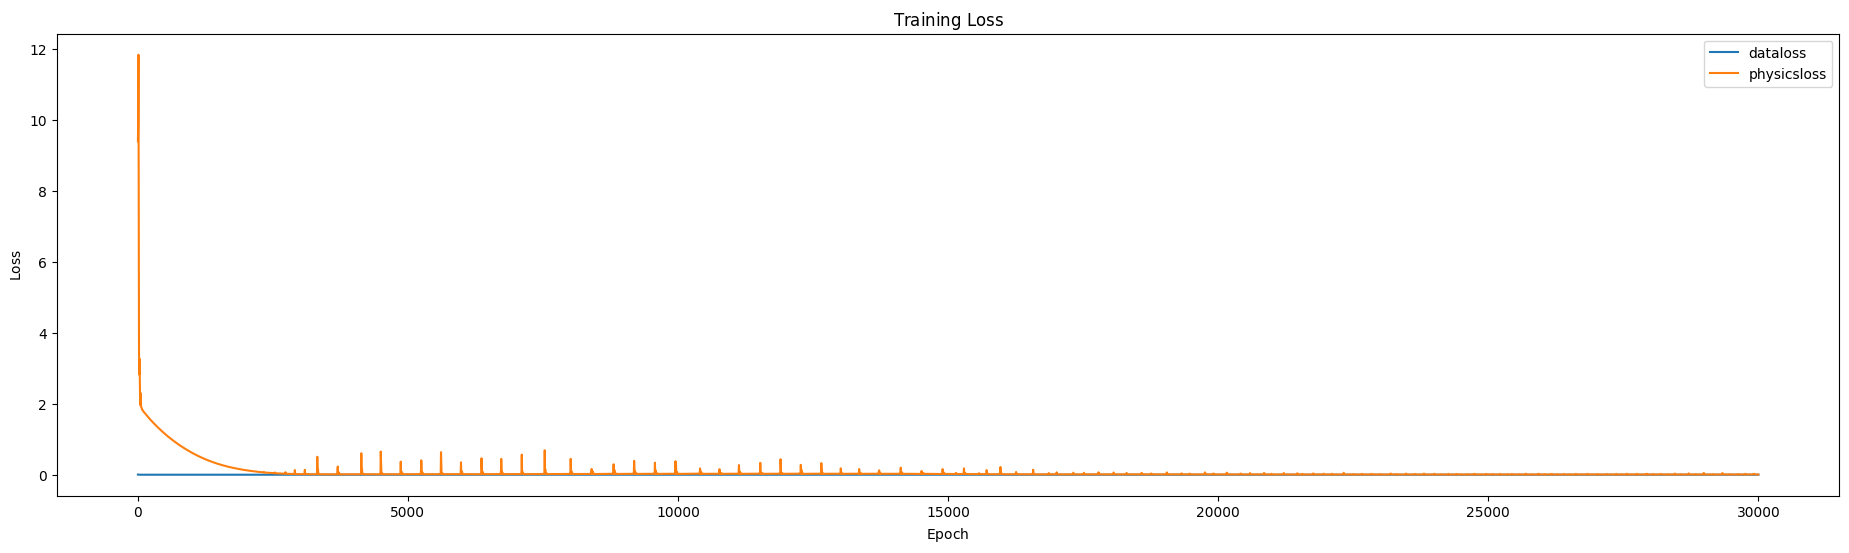

In [37]:
torch.manual_seed(123)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

x_train = torch.tensor(X.query("time <= 5")["time"].values).float().unsqueeze(1).to(device)
y_train = torch.tensor(X.query("time <= 5")["displacement"].values).float().unsqueeze(1).to(device)

x_test = torch.tensor(X.query("time > 5")["time"].values).float().unsqueeze(1).to(device)
y_test = torch.tensor(X.query("time > 5")["displacement"].values).float().unsqueeze(1).to(device)

hparam_dict = {
    'learning_rate': 1e-3,
    'n_layers': 3,
    'n_neurons': 32,
    'num_epochs': 30000,
 }

learning_rate = hparam_dict["learning_rate"]
num_epochs = hparam_dict["num_epochs"]
architecture = [1] + [hparam_dict["n_neurons"] for _ in range(hparam_dict["n_layers"])] + [1]

plot_loss_train = dict(epoch=[], dataloss=[], physicsloss=[])

_locations = torch.linspace(0, 10, 50).view(-1,1).requires_grad_(True).to(device)
_m = torch.tensor(m, dtype=torch.float, requires_grad=False).to(device)
_c = torch.tensor(c, dtype=torch.float, requires_grad=False).to(device)
_k = torch.tensor(k, dtype=torch.float, requires_grad=False).to(device)
_w = torch.tensor(w, dtype=torch.float, requires_grad=False).to(device)
_x0 = torch.tensor(x0, dtype=torch.float, requires_grad=False).to(device)
_v0 = torch.tensor(v0, dtype=torch.float, requires_grad=False).to(device)
_phid = torch.tensor(phid, dtype=torch.float, requires_grad=False).to(device)
_F0 = torch.tensor(2, dtype=torch.float, requires_grad=True, device=device)

model = MultiLayerPerceptronRegressor(architecture, nn.Tanh)
model.to(device)
optimizer = optim.Adam([{"params": model.parameters()}, {"params": [_F0]}], lr=learning_rate)
criterion = nn.MSELoss()

print(model)

for epoch in tqdm.tqdm(range(hparam_dict["num_epochs"])):
    optimizer.zero_grad()

    # forward
    y_train_hat = model(x_train)
    data_loss = criterion(y_train_hat, y_train)

    y_location_hat = model(_locations)
    dydt = torch.autograd.grad(y_location_hat, _locations, grad_outputs=torch.ones_like(y_location_hat), create_graph=True)[0]
    dy2dt2 = torch.autograd.grad(dydt, _locations, grad_outputs=torch.ones_like(dydt), create_graph=True)[0]

    
    _diff_equation = _m*dy2dt2 + _c*dydt + _k*y_location_hat - _F0*torch.cos(_w*_locations-_phid)
    physics_loss = criterion(_diff_equation, torch.zeros_like(_diff_equation))
    _x0_loss = criterion(y_location_hat[0], _x0)
    _v0_loss = criterion(dydt[0], _v0)

    loss = data_loss + (1e-4)*(physics_loss)# + (1e-3)*(_x0_loss) + (1e-3)*(_v0_loss)
    
    # backward
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 1000 == 0:
        str_epoch = str(epoch+1).zfill(5)
        str_num_epochs = str(num_epochs).zfill(5)
        str_loss = str(round(loss.item(), 4))
        str_physics_loss = str(round(physics_loss.item(), 4))
        # print(f"epoch [{str_epoch}/{str_num_epochs}] loss: {str_loss} physics loss: {str_physics_loss}")
        print("F0: ", _F0.item())
        print(f"Data Loss: {data_loss.item():.6f}, Physics Loss: {physics_loss.item():.6f}, x0 Loss: {_x0_loss.item():.6f}, v0 Loss: {_v0_loss.item():.6f}, Total Loss: {loss.item():.6f}")

    if (epoch+1) % 5 == 0:
        plot_loss_train["epoch"].append(epoch+1)
        plot_loss_train["dataloss"].append(data_loss.item())
        plot_loss_train["physicsloss"].append(physics_loss.item())

fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(23, 6))

pd.DataFrame(plot_loss_train).plot(x="epoch", y="dataloss", figsize=(23, 6), ax=ax1)
pd.DataFrame(plot_loss_train).plot(x="epoch", y="physicsloss", figsize=(23, 6), ax=ax1)
ax1.set_xlabel(r"$\mathrm{Epoch}$")
ax1.set_ylabel(r"$\mathrm{Loss}$")
ax1.set_title(r"$\mathrm{Training}$ $\mathrm{Loss}$")

plt.savefig("../data/08_reporting/figures/oscilador_harmonico_loss_pinn.png", dpi=300, bbox_inches="tight") ;

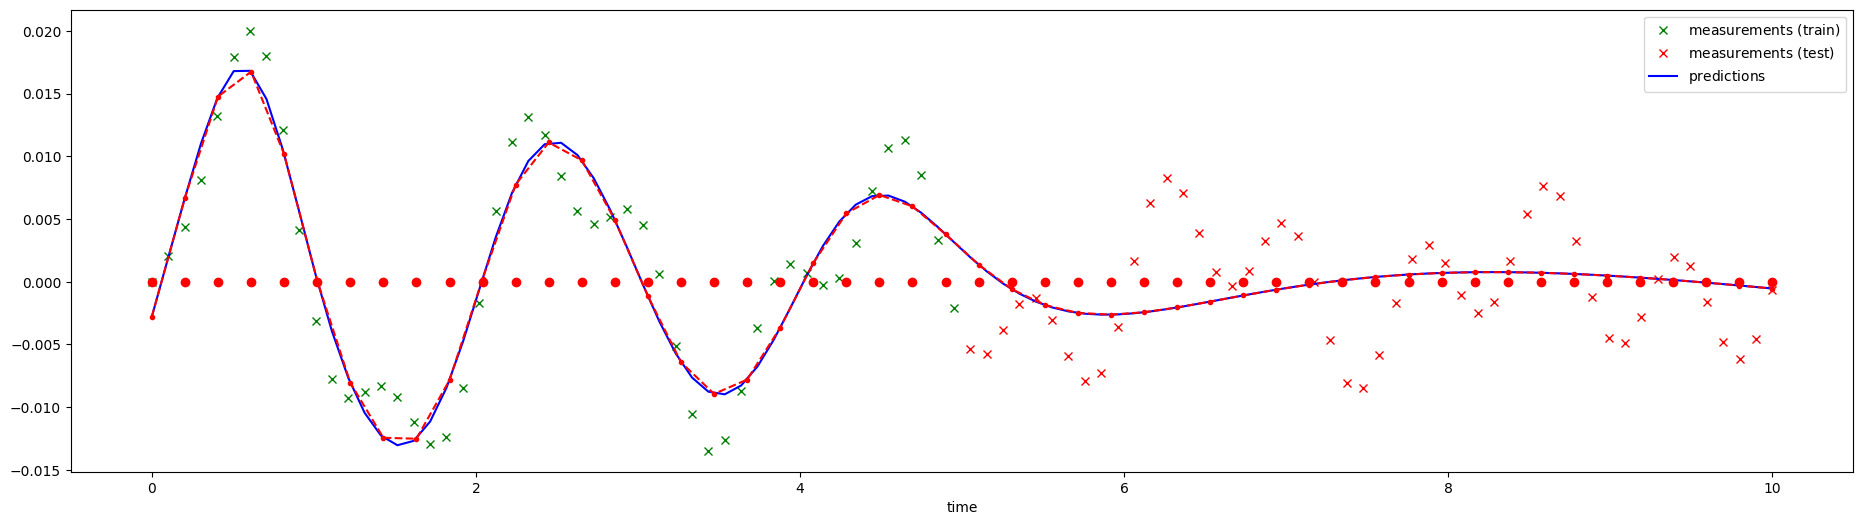

In [38]:
model.eval()

with torch.no_grad():
    X["y_hat"] = model(torch.tensor(X["time"].values).float().unsqueeze(1).to(device)).cpu().detach().numpy()

fig, (ax1) = plt.subplots(ncols=1, nrows=1, figsize=(23, 6))

X.query("time <= 5").plot(
    x="time", 
    y="displacement", 
    ax=ax1,
    marker="x", c="g", linestyle="none", 
    label=r"$\text{measurements (train)}$"
)

X.query("time > 5").plot(
    x="time", 
    y="displacement", 
    ax=ax1,
    marker="x", c="r", linestyle="none", 
    label=r"$\text{measurements (test)}$"
)

X.plot(
    x="time", 
    y="y_hat", 
    ax=ax1,
    c="b", linestyle="-", 
    label=r"$\text{predictions}$"
)

ax1.plot(
    _locations.cpu().detach().numpy().reshape(-1, 1),
    model(_locations).cpu().detach().numpy().reshape(-1)*0, 
    c="r", linestyle="none", marker="o",
    label=r"$\text{locations}$"
)

ax1.plot(
    _locations.cpu().detach().numpy().reshape(-1, 1),
    model(_locations).cpu().detach().numpy().reshape(-1), 
    c="r", linestyle="--", marker=".",
    label=r"$\text{locations prediction}$"
)

# # plot theoretical curve
# m = 1
# k = 1
# mu = 0.1
# x_0 = 1
# v_0 = 0

# omega_0 = np.sqrt(k/m)
# delta = mu/(2*m)
# omega = np.sqrt(omega_0**2 - delta**2)

# t = np.linspace(0, 50, 1000)
# x = np.exp(-delta*t)*(x_0*np.cos(omega*t) + (v_0 + delta*x_0)/omega*np.sin(omega*t))
# ax1.plot(
#     t.reshape(-1, 1),
#     x, 
#     c="k", linestyle="--", 
#     label=r"$\text{exact solution}$"
# )

# ax1.set_xlabel(r"$\mathrm{time}$ $\mathrm{(s)}$")
# ax1.set_ylabel(r"$\mathrm{displacement}$ $\mathrm{(m)}$")
# ax1.set_title(r"$\mathrm{Damped}$ $\mathrm{Harmonic}$ $\mathrm{Oscillator}$")

# plt.suptitle(f"MSE = {round(mean_squared_error(X['displacement'], X['y_hat']), 4)}")
# ax1.legend()

# plt.savefig("../data/08_reporting/figures/oscilador_harmonico_predictions_pinn.png", dpi=300, bbox_inches="tight") ;

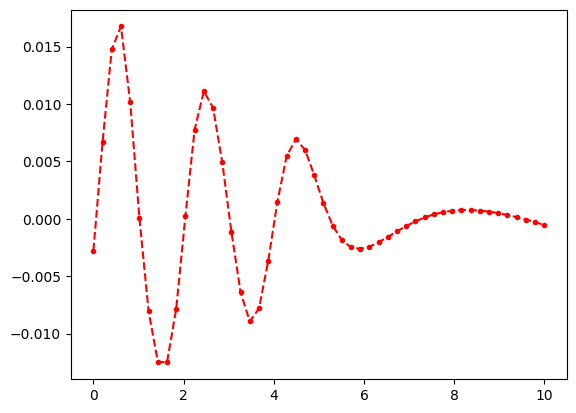

In [39]:
model.eval()
with torch.no_grad():
    plt.plot(
        _locations.cpu().detach().numpy().reshape(-1, 1),
        model(_locations).cpu().detach().numpy().reshape(-1), 
        c="r", linestyle="--", marker=".",
        label=r"$\text{locations prediction}$"
    )

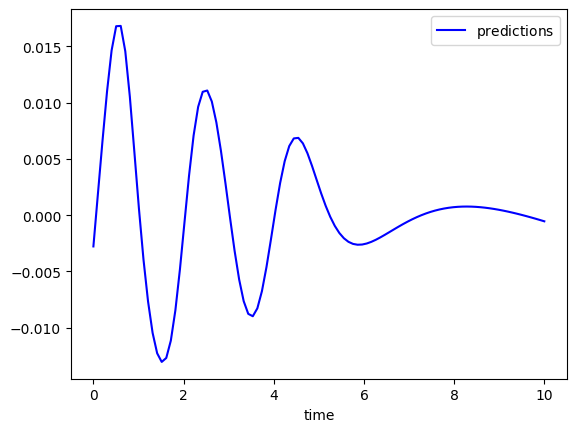

In [40]:
X.plot(
    x="time", 
    y="y_hat",
    c="b", linestyle="-", 
    label=r"$\text{predictions}$"
) ;

.